# Find synonyms

In [11]:
import time
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from collections import defaultdict

def get_synonyms(seed_words, model):
    '''
    with optimize 2 : dynamic programming
    @seed_words are words that we already known
    @model is the word2vec model
    '''
    dp_table = defaultdict(list)

    unseen = seed_words;
    seen = defaultdict(int)
    max_size = 500 # when found max_size synonyms we stop
    while unseen and len(seen) < max_size:
        if len(seen) % 100 == 0:
            print('seen size: {}'.format(len(seen)))

        node = unseen.pop(0)
        if not dp_table[node]:
            dp_table[node] = [w for w,s in model.wv.most_similar(node, topn=20)]

        new_expanding = dp_table[node]
        unseen += new_expanding
        seen[node] += 1

        # optimize: 1. score function could be revised
        # optimize: 2. using dynamic programming to reduce computing time

    return seen

In [12]:
start = time.perf_counter()
synonyms = get_synonyms(['说', '表示'], Word2Vec.load('../lesson04/cbow_word2vec.model'))
end = time.perf_counter()
print("Running time:{} seconds".format(end-start))
synonyms_sorted = sorted(synonyms.items(), key=lambda x: x[1], reverse=True)

seen size: 0
seen size: 100
seen size: 200
seen size: 300
seen size: 300
seen size: 400
Running time:34.13314522100063 seconds


In [13]:
synonyms_sorted

[('说道', 26),
 ('说', 25),
 ('指出', 23),
 ('认为', 20),
 ('声称', 18),
 ('写道', 18),
 ('表示', 17),
 ('反问', 15),
 ('宣称', 15),
 ('提到', 14),
 ('断言', 13),
 ('告诉', 12),
 ('问道', 12),
 ('重申', 12),
 ('断定', 12),
 ('中说', 10),
 ('强调', 10),
 ('辩称', 10),
 ('谈到', 10),
 ('答道', 10),
 ('反驳', 10),
 ('所说', 9),
 ('确信', 9),
 ('表明', 9),
 ('坚称', 9),
 ('时说', 8),
 ('问', 8),
 ('回应', 8),
 ('还称', 8),
 ('干什么', 8),
 ('驳斥', 8),
 ('问起', 8),
 ('觉得', 7),
 ('说出', 7),
 ('表示遗憾', 7),
 ('发表声明', 7),
 ('解释', 7),
 ('论断', 7),
 ('谈及', 7),
 ('相信', 7),
 ('批评', 7),
 ('质问', 7),
 ('否认', 7),
 ('指称', 6),
 ('直言', 6),
 ('所述', 6),
 ('中称', 6),
 ('引述', 6),
 ('证实', 6),
 ('地问', 6),
 ('道歉', 6),
 ('要说', 5),
 ('声明', 5),
 ('澄清', 5),
 ('暗示', 5),
 ('看来', 5),
 ('得出结论', 5),
 ('明确指出', 5),
 ('知道', 5),
 ('指责', 5),
 ('责问', 5),
 ('表态', 4),
 ('称赞', 4),
 ('喊道', 4),
 ('抱怨', 4),
 ('回答', 4),
 ('推测', 4),
 ('自述', 4),
 ('或许', 4),
 ('援引', 4),
 ('询问', 4),
 ('透漏', 4),
 ('指控', 4),
 ('承认', 4),
 ('问其', 4),
 ('试问', 4),
 ('竟敢', 4),
 ('怒斥', 4),
 ('写给', 4),
 ('否定', 4),
 ('痛批', 4),


# TF IDF

In [4]:
import re
def token(string):
    """
    only keep number and words
    """
    return re.findall(r'[\d|\w]+', string)

In [5]:
import jieba
def cut(string): return ' '.join(jieba.cut(string))

In [6]:
import pandas as pd
def get_documents():
    csv_path = 'sqlResult_1558435.csv'
    database = pd.read_csv(csv_path, encoding='gb18030')
    database = database.fillna('')
    contents = database['content'].tolist()
    contents = [token(n) for n in contents]
    contents = [' '.join(n) for n in contents]
    contents = [cut(n) for n in contents]
    return contents

In [7]:
documents = get_documents()
documents[0]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DINGLI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.168 seconds.
Prefix dict has been built succesfully.


'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

$TF(Term Frequency) = \frac{单词在页面中出现的次数}{页面单词总数}$

In [8]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [9]:
tf('银行', documents[11])

6

$IDF(Inverse Document Frequency) = \log(\frac{网页总数}{出现单词w的网页数})$

In [10]:
import math
def idf(word, documents):
    """
    Gets the Inverse Document Frequency of a @word in @documents
    """
    D_w = sum(1 for doc in documents if word in doc)
    D = len(documents)
    return math.log10(D / D_w)

In [11]:
idf('银行', documents)

1.4550169427748936

## Get keywords of a document

In [12]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    
    tfidf = [(w, tf(w, document) * idf(w, documents)) for w in words]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [13]:
get_keywords_of_a_document(documents[11])

[('市场', 21.353584391728972),
 ('股指', 18.198034968575843),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875366993),
 ('板块', 15.184208429020511),
 ('创业板', 15.040542723113257),
 ('沪', 14.096891190311872),
 ('反弹', 11.40131732928378),
 ('巨丰', 11.244724023409647),
 ('普涨', 11.1657372072426),
 ('居前', 10.78835527475667),
 ('午后', 10.712813898115176),
 ('早盘', 10.614032989531069),
 ('大盘', 10.528860150725679),
 ('保险', 9.712428450401568),
 ('跳水', 9.392541082832015),
 ('具备', 9.384071811999714),
 ('局部性', 8.950480138145622),
 ('走势', 8.886316192504337),
 ('回落', 8.85749598983617),
 ('银行', 8.730101656649362),
 ('大涨', 8.113164172292002),
 ('涨幅', 7.982850978349081),
 ('阴线', 7.904722647584947),
 ('普跌', 7.676835942971274),
 ('上影线', 7.552540129473584),
 ('半年线', 7.552540129473584),
 ('题材', 7.529644664184074),
 ('个股', 7.317431171173604),
 ('伏击', 7.0747759516433115),
 ('探底', 7.010406584900509),
 ('行情', 6.978062869252294),
 ('兴业银行', 6.560526931713512),
 ('沪市', 6.52433048752792),
 ('复星', 6.472715960315349),
 ('白马股'

# WordCloud

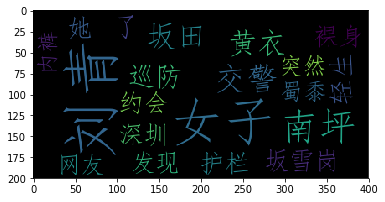

In [27]:
import matplotlib.pyplot as plt
from PIL import Image
import wordcloud
wc = wordcloud.WordCloud(r'C:\Windows\Fonts\simfang.ttf')
shenzhen_social_news = get_keywords_of_a_document(documents[4])
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))